#  Balancing Privacy and Accuracy in Machine Learning Models with Differential Privacy

## 1 . Introduction & Problem Statement

This project explores how **Differential Privacy Stochastic Gradient Descent (DP-SGD)** and **Model Agnostic Private Learning (MAPL)** impact machine learning models. Specifically, we examine whether DP techniques interfere with model accuracy and the evolution of machine learning.

## 2 . Setup - Install Required Packages

Run the code below if there are missing packages:

In [2]:
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install scikit-learn==1.3.2
%pip install ucimlrepo
%pip install imblearn
%pip install tabulate
%pip install boruta
%pip install torch
%pip install opacus
%pip install scipy
%pip install numpy
%pip install imbalanced-learn==0.11.0
%pip install diffprivlib
print("Libraries installed successfully.")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Libraries installed successfully.


## 3 . Data Exploration & Understanding

We are importing the relevant libraries and getting the data:

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo #to retrieve the dataset

# Getting the data
dataset_id = 891  # our chosen dataset
dataset = fetch_ucirepo(id=dataset_id)
df = dataset.data.original

# # Previous way to retrieve the dataset (for documentation)
# url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
# df = pd.read_csv(url)

# Set display options
pd.set_option('display.max_columns', None)


We have observed that the dataset contains 253,680 records with 23 features:

In [4]:
# Checking basic Dataset Information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (253680, 23)

First 5 rows:


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


We have observed that all features are stored as integer data types:

The following table shows the features and their descriptions:

| Variable Name     | Role    | Type    | Description                                                                 |
|-------------------|---------|---------|-----------------------------------------------------------------------------|
| ID                | ID      | Integer | Patient ID                                                                  |
| Diabetes_binary   | Target  | Binary  | 0 = no diabetes 1 = prediabetes or diabetes                                 |
| HighBP            | Feature | Binary  | 0 = no high BP 1 = high BP                                                  |
| HighChol          | Feature | Binary  | 0 = no high cholesterol 1 = high cholesterol                                |
| CholCheck         | Feature | Binary  | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years    |
| BMI               | Feature | Integer | Body Mass Index                                                             |
| Smoker            | Feature | Binary  | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes |
| Stroke            | Feature | Binary  | (Ever told) you had a stroke. 0 = no 1 = yes                                |
| HeartDiseaseorAttack | Feature | Binary | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes  |
| PhysActivity      | Feature | Binary  | physical activity in past 30 days - not including job 0 = no 1 = yes        |
| Fruits            | Feature | Binary  | Consume Fruit 1 or more times per day 0 = no 1 = yes                        |
| Veggies           | Feature | Binary  | Consume Vegetables 1 or more times per day 0 = no 1 = yes                   |
| HvyAlcoholConsump | Feature | Binary  | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes |
| AnyHealthcare     | Feature | Binary  | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes |
| NoDocbcCost       | Feature | Binary  | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes |
| GenHlth           | Feature | Integer | General health: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor |
| MentHlth          | Feature | Integer | For how many days during the past 30 days was your mental health not good? scale 1-30 days |
| PhysHlth          | Feature | Integer | For how many days during the past 30 days was your physical health not good? scale 1-30 days |
| DiffWalk          | Feature | Binary  | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes   |
| Sex               | Feature | Binary  | 0 = female 1 = male                                                    |
| Age               | Feature | Integer | 13 levels, 1 = 18-24, 9 = 60-64, 13 = 80 or older              |
| Education         | Feature | Integer | 6 levels, 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1 year to 3 years, 6 = College 4 years or more |
| Income            | Feature | Integer | 8 levels, 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more |


In [5]:
# Checking data types
print("\nData Types:")
print(df.dtypes)


Data Types:
ID                      int64
Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


We have observed basic statistics for the features:

In [6]:
# Checking basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                  ID  Diabetes_binary         HighBP       HighChol  \
count  253680.000000    253680.000000  253680.000000  253680.000000   
mean   126839.500000         0.139333       0.429001       0.424121   
std     73231.252481         0.346294       0.494934       0.494210   
min         0.000000         0.000000       0.000000       0.000000   
25%     63419.750000         0.000000       0.000000       0.000000   
50%    126839.500000         0.000000       0.000000       0.000000   
75%    190259.250000         0.000000       1.000000       1.000000   
max    253679.000000         1.000000       1.000000       1.000000   

           CholCheck            BMI         Smoker         Stroke  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.962670      28.382364       0.443169       0.040571   
std         0.189571       6.608694       0.496761       0.197294   
min         0.000000      12.000000       0.000000       0.000000

We have observed that there are no missing values (as stated in the dataset description):

In [7]:
# Checking for missing values
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

We have observed that the dataset only has 13.93% records with diabetes. We will address this imbalance later during data cleaning and preprocessing:

In [8]:
# Checking distribution of dataset
diabetes_counts = df['Diabetes_binary'].value_counts()
print("Distribution of target variable:")
print(diabetes_counts)
print(f"Percentage of records with diabetes: {diabetes_counts[1]/len(df)*100:.2f}%")

Distribution of target variable:
0    218334
1     35346
Name: Diabetes_binary, dtype: int64
Percentage of records with diabetes: 13.93%


We have observed a basic relationship between the features using a correlation matrix. We still need to explain what we can see from this:

## 4 . Preprocessing

Usually in preprocessing we would handle missing values, encoding binary data (True -> 1), encoding categorical data, feature scaling. However, since the dataset is already clean and preprocessed, we will only address the class imbalance issue.
In the balanced datased, we have reduced the number of records with diabetes to match the number of records without diabetes, so that the dataset is balanced.

### 4.1 Class Balancing

In [9]:
num_with_diabetes = df['Diabetes_binary'].value_counts()[1]

print("\nOriginal Dataset:")
print(f"- Total samples in the original dataset: {len(df)}")
print(f"- Samples with diabetes (class 1): {num_with_diabetes}")
print(f"- Samples without diabetes (class 0): {df['Diabetes_binary'].value_counts()[0]}")

df_no_diabetes = df[df['Diabetes_binary'] == 0].sample(n=num_with_diabetes, random_state=42)
df_with_diabetes = df[df['Diabetes_binary'] == 1]

df_balanced = pd.concat([df_no_diabetes, df_with_diabetes])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced_noTarget = df_balanced.drop(columns=["Diabetes_binary", "ID"])
y_balanced = df_balanced["Diabetes_binary"]

print("\nBalanced Dataset:")
print(f"- Total samples in the balanced dataset: {len(df_balanced)}")
print(df_balanced['Diabetes_binary'].value_counts())

print(f"- Samples without diabetes (class 0): {df_balanced['Diabetes_binary'].value_counts()[0]}")
print(f"- Samples with diabetes (class 1): {df_balanced['Diabetes_binary'].value_counts()[1]}")



Original Dataset:
- Total samples in the original dataset: 253680
- Samples with diabetes (class 1): 35346
- Samples without diabetes (class 0): 218334

Balanced Dataset:
- Total samples in the balanced dataset: 70692
1    35346
0    35346
Name: Diabetes_binary, dtype: int64
- Samples without diabetes (class 0): 35346
- Samples with diabetes (class 1): 35346


### 4.2 Data Splitting Strategy 

Before training our models we have to split the data into a training set and a test set. We have chosen a 80/20 split, which ensures we have enough training data for the model to learn patterns and enough data for performance evaluation. We have used stratified sampling to ensure that both the training set and test set includes a 50/50 split of records having diabetes or not.

In [10]:
from sklearn.model_selection import train_test_split


X_balanced = df_balanced.drop('Diabetes_binary', axis=1) # drop the target column
y_balanced = df_balanced['Diabetes_binary']

X_imbalanced = df.drop('Diabetes_binary', axis=1) #drop the target column
y_imbalanced = df['Diabetes_binary']

# split into train (70%) and temp (30%)
X_train_bal, X_temp_bal, y_train_bal, y_temp_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# split temp set into validation (10%) and test (20%)
X_val_bal, X_test_bal, y_val_bal, y_test_bal = train_test_split(
    X_temp_bal, y_temp_bal, test_size=2/3, random_state=42, stratify=y_temp_bal
)

# Imbalanced dataset
X_train_imb, X_temp_imb, y_train_imb, y_temp_imb = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.3, random_state=42, stratify=y_imbalanced
)

X_val_imb, X_test_imb, y_val_imb, y_test_imb = train_test_split(
    X_temp_imb, y_temp_imb, test_size=2/3, random_state=42, stratify=y_temp_imb
)

print(f"Balanced Training set: {X_train_bal.shape[0]} samples")
print(f"Balanced Validation set: {X_val_bal.shape[0]} samples")
print(f"Balanced Testing set: {X_test_bal.shape[0]} samples")

print("\nClass distribution in balanced training set:")
print(y_train_bal.value_counts(normalize=True))

print("\nClass distribution in balanced validation set:")
print(y_val_bal.value_counts(normalize=True))

print("\nClass distribution in balanced testing set:")
print(y_test_bal.value_counts(normalize=True))

print(f"\nImbalanced Training set: {X_train_imb.shape[0]} samples")
print(f"Imbalanced Validation set: {X_val_imb.shape[0]} samples")
print(f"Imbalanced Testing set: {X_test_imb.shape[0]} samples")

print("\nClass distribution in imbalanced training set:")
print(y_train_imb.value_counts(normalize=True))

print("\nClass distribution in imbalanced validation set:")
print(y_val_imb.value_counts(normalize=True))

print("\nClass distribution in imbalanced testing set:")
print(y_test_imb.value_counts(normalize=True))


Balanced Training set: 49484 samples
Balanced Validation set: 7069 samples
Balanced Testing set: 14139 samples

Class distribution in balanced training set:
1    0.5
0    0.5
Name: Diabetes_binary, dtype: float64

Class distribution in balanced validation set:
1    0.500071
0    0.499929
Name: Diabetes_binary, dtype: float64

Class distribution in balanced testing set:
0    0.500035
1    0.499965
Name: Diabetes_binary, dtype: float64

Imbalanced Training set: 177576 samples
Imbalanced Validation set: 25368 samples
Imbalanced Testing set: 50736 samples

Class distribution in imbalanced training set:
0    0.860668
1    0.139332
Name: Diabetes_binary, dtype: float64

Class distribution in imbalanced validation set:
0    0.860651
1    0.139349
Name: Diabetes_binary, dtype: float64

Class distribution in imbalanced testing set:
0    0.860671
1    0.139329
Name: Diabetes_binary, dtype: float64


### 4.3 Feature Selection

This might be a defense against the attacks, because the less features we have, the less information we leak.

We need to explain which features we have chosen based on the data exploration above and the following feature selection methods. We can use variance threshold, correlation matrix, kbest, rfe, boruta...

['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age'] ok with V.T. and C.M.

Might want to use more features to try the attacks

In [11]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import (
    RFE,
    SelectKBest,
    VarianceThreshold,
    mutual_info_classif,
)
from boruta import BorutaPy
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

def save_results(results, file_path, columns):
    results_df = pd.DataFrame(results, columns=columns)
    if not os.path.exists(os.path.dirname(file_path)):
        os.makedirs(os.path.dirname(file_path))
    results_df.to_csv(file_path, index=False)

def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    return (accuracy, precision, recall, f1)

def getVariances(threshold, data):
    var_threshold = VarianceThreshold(threshold=threshold)
    var_threshold.fit(data)
    variances = var_threshold.variances_
    # Create a DataFrame for variances
    variances_df = pd.DataFrame(variances, index=data.columns, columns=["Variance"])
    # Sort variances in descending order
    variances_df = variances_df.sort_values(by="Variance", ascending=False)
    # Features with variance >= threshold
    features_high_variance = variances_df[variances_df["Variance"] >= threshold]
    # Features with variance < threshold
    features_low_variance = variances_df[variances_df["Variance"] < threshold]
    return variances_df, features_high_variance, features_low_variance

def getKBest(k, data, target):
    # selection
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    x_kbest = selector.fit_transform(data, target)
    # Create a DataFrame with the selected features
    kbest_features = data.columns[selector.get_support()]
    x_kbest_df = pd.DataFrame(x_kbest, columns=kbest_features)
    return x_kbest_df

def process_kbest(data, target, k, file_path):
    try:
        x_kbest_df = pd.read_csv(file_path)
    except FileNotFoundError:
        x_kbest_df = getKBest(k, data, target)
        x_kbest_df[target.name] = target.values
        x_kbest_df.to_csv(file_path, index=False)
    x_kbest_df = x_kbest_df.drop(columns=[target.name], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(
        x_kbest_df, target, test_size=0.3, random_state=42, stratify=target
    )
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
    kbest_features_names = x_kbest_df.columns.tolist()
    return (k, accuracy, precision, recall, f1, kbest_features_names)

def getRFE(k, data, target):
    # selection
    selector = RFE(estimator=rf_model, n_features_to_select=k)
    x_rfe = selector.fit_transform(data, target)
    # Create a DataFrame with the selected features
    rfe_features = data.columns[selector.get_support()]
    x_rfe_df = pd.DataFrame(x_rfe, columns=rfe_features)
    return x_rfe_df

def process_rfe(data, target, k, file_path):
    try:
        x_rfe_df = pd.read_csv(file_path)
    except FileNotFoundError:
        x_rfe_df = getRFE(k, data, target)
        x_rfe_df[target.name] = target.values
        x_rfe_df.to_csv(file_path, index=False)
    x_rfe_df = x_rfe_df.drop(columns=[target.name], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(
        x_rfe_df, target, test_size=0.3, random_state=42, stratify=target
    )
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
    rfe_features_names = x_rfe_df.columns.tolist()
    return (k, accuracy, precision, recall, f1, rfe_features_names)

def apply_boruta(data, target):
    x_train, x_test, y_train, y_test = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=target
    )
    boruta = BorutaPy(
        rf_model,
        n_estimators="auto",
        verbose=2,
        random_state=42,
    )
    boruta.fit(x_train.values, y_train.values)
    sel_x_train = boruta.transform(x_train.values)
    sel_x_test = boruta.transform(x_test.values)
    rf_model.fit(sel_x_train, y_train)
    y_pred = rf_model.predict(sel_x_test)
    accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
    selected_features = x_train.columns[boruta.support_].tolist()
    return (accuracy, precision, recall, f1, selected_features)

#### 4.3.1 Variance Threshold

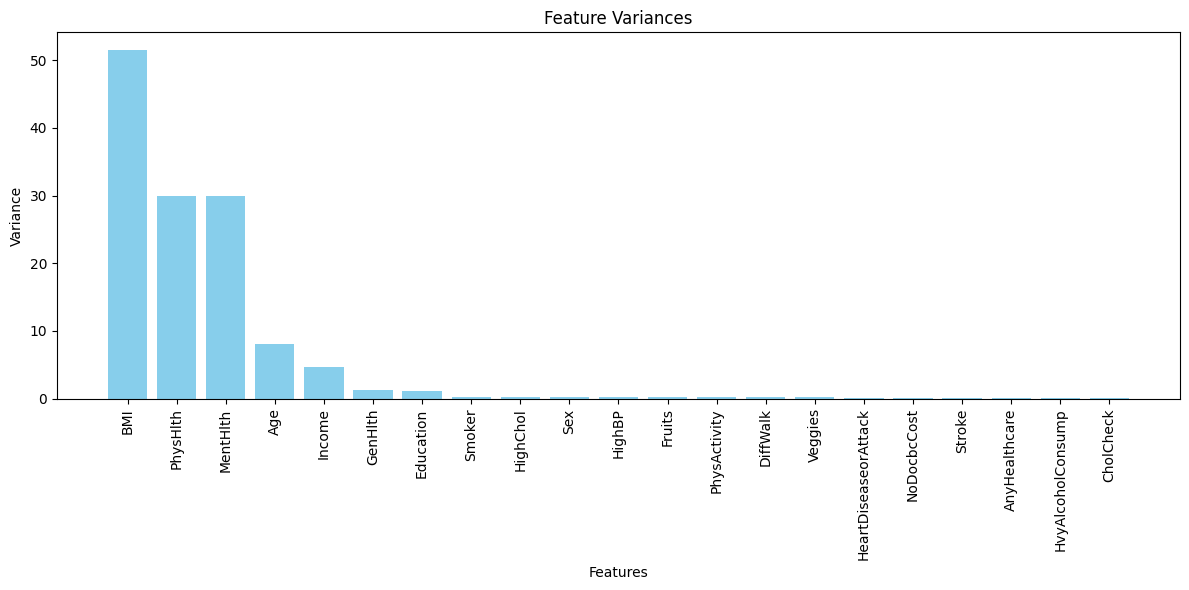


Features with High Variance:
                       Variance
BMI                   51.546192
PhysHlth              30.000000
MentHlth              30.000000
Age                    8.097407
Income                 4.720747
GenHlth                1.238609
Education              1.063818
Smoker                 0.249415
HighChol               0.249212
Sex                    0.248249
HighBP                 0.246048
Fruits                 0.237552
PhysActivity           0.208977
DiffWalk               0.189228
Veggies                0.168074
HeartDiseaseorAttack   0.126768
NoDocbcCost            0.085646
Stroke                 0.058393
AnyHealthcare          0.043732
HvyAlcoholConsump      0.041348
CholCheck              0.023739

Features with Low Variance:
Empty DataFrame
Columns: [Variance]
Index: []


In [12]:
variances_df, features_high_variance, features_low_variance = getVariances(
    0, df_balanced_noTarget
)

# Plot variances of all features
plt.figure(figsize=(12, 6))
plt.bar(variances_df.index, variances_df['Variance'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Feature Variances')
plt.tight_layout()
plt.show()

# Highlight features with high and low variance
print("\nFeatures with High Variance:")
print(features_high_variance)
print("\nFeatures with Low Variance:")
print(features_low_variance)

#### 4.3.2 Correlation Matrix

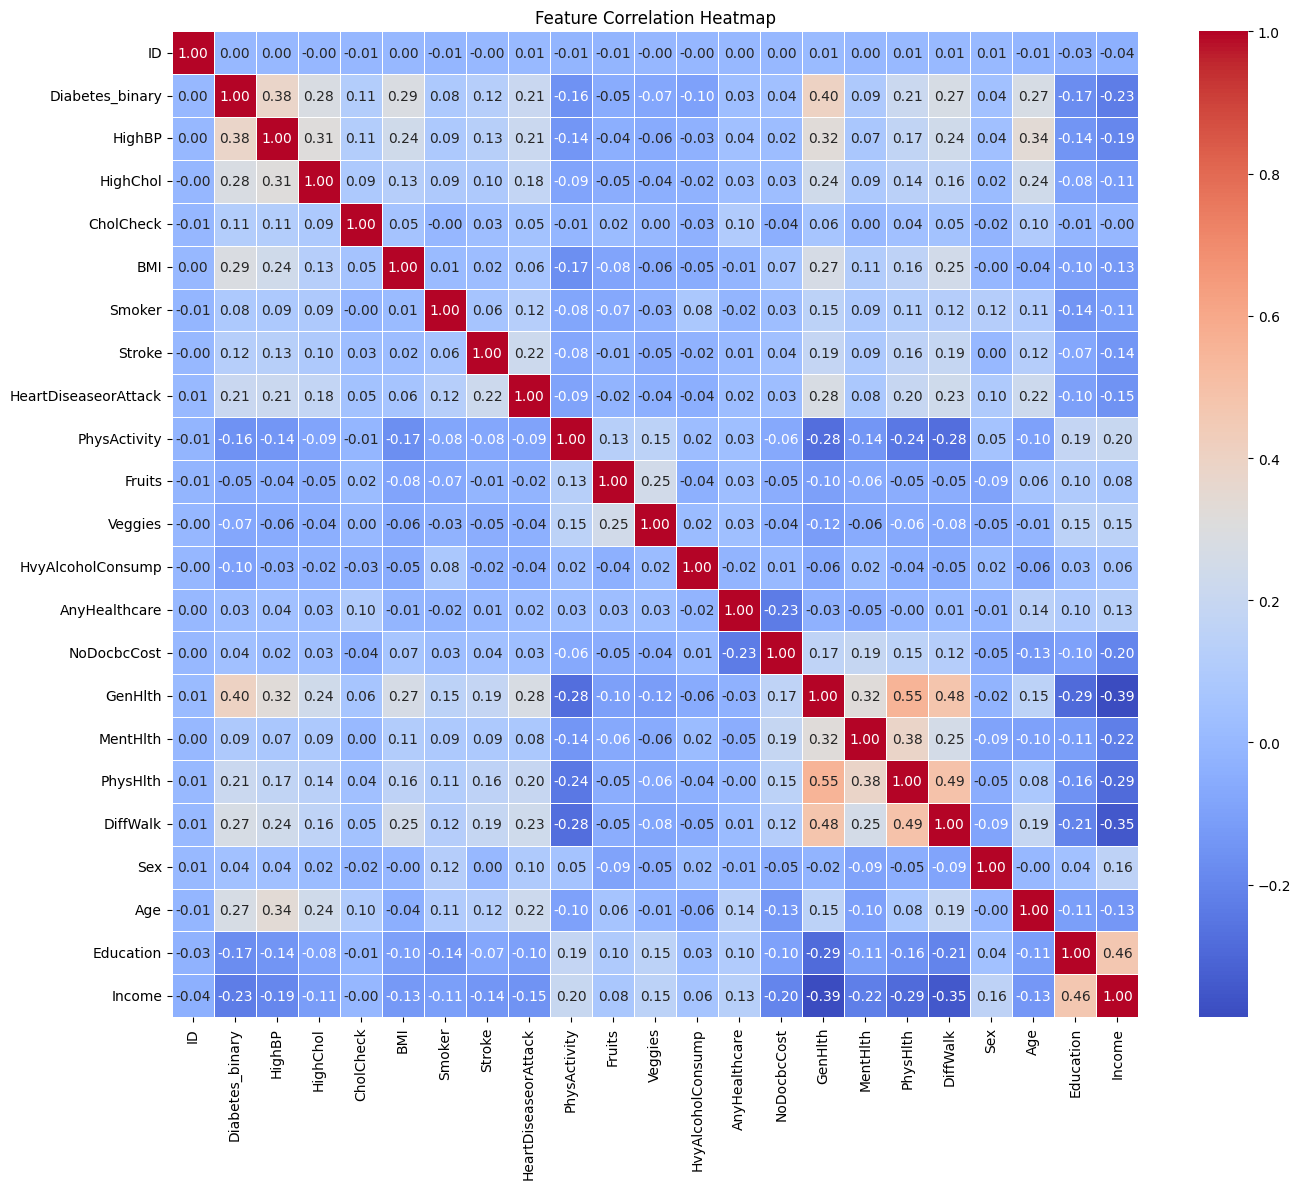


Features correlated with Diabetes (sorted):
Diabetes_binary         1.000000
GenHlth                 0.403482
HighBP                  0.382655
BMI                     0.287082
HighChol                0.284526
Age                     0.274373
DiffWalk                0.270656
PhysHlth                0.211926
HeartDiseaseorAttack    0.207632
Stroke                  0.124924
CholCheck               0.113663
MentHlth                0.091290
Smoker                  0.084918
Sex                     0.042076
NoDocbcCost             0.038524
AnyHealthcare           0.026787
ID                      0.003379
Fruits                 -0.053606
Veggies                -0.072736
HvyAlcoholConsump      -0.096767
PhysActivity           -0.157506
Education              -0.170107
Income                 -0.225386
Name: Diabetes_binary, dtype: float64


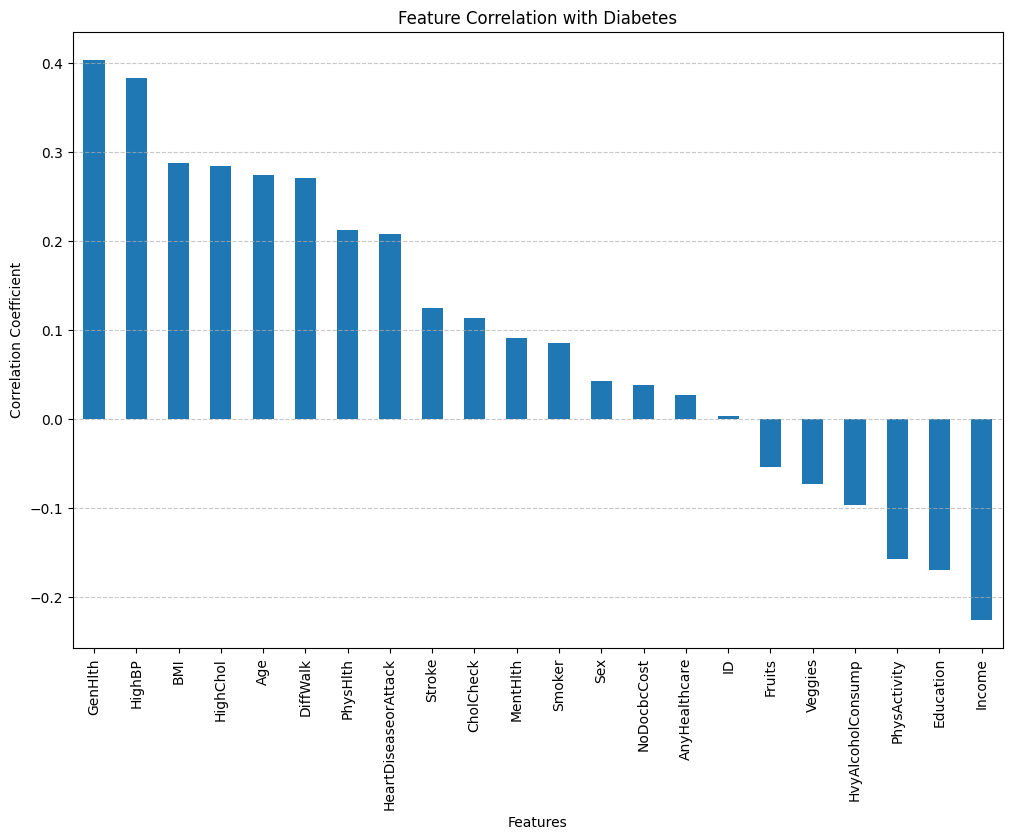

In [13]:
# Calculate correlation matrix
correlation_matrix = df_balanced.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Focus on correlations with the target variable
diabetes_correlations = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print("\nFeatures correlated with Diabetes (sorted):")
print(diabetes_correlations)

# Visualize correlations with the target
plt.figure(figsize=(12, 8))
diabetes_correlations[1:].plot(kind='bar')  # Exclude self-correlation
plt.title("Feature Correlation with Diabetes")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 4.3.3 KBest

In [14]:
# results = []
# columns = ["Model", "K", "Accuracy", "Precision", "Recall", "F1-Score", "Features"]
# for k in range(1, df_balanced_noTarget.shape[1] + 1):
#     file_path = f"featureSelectionData/kbest/k/{k}best_features.csv"
#     kbestResult = process_kbest(df_balanced_noTarget, y_balanced, k, file_path)
#     results.append(("rf",) + kbestResult)
# save_results(
#     results, f"featureSelectionData/kbest/kbest_rf_results.csv", columns
# )

#### 4.3.4 RFE

In [15]:
# results = []
# columns = ["Model", "K", "Accuracy", "Precision", "Recall", "F1-Score", "Features"]
# for k in range(1, df_balanced_noTarget.shape[1] + 1):
#     file_path = f"featureSelectionData/rfe/k/{k}rfe_features.csv"
#     rfeResult = process_rfe(df_balanced_noTarget, y_balanced, k, file_path)
#     results.append(("rf",) + rfeResult)
# save_results(results, f"featureSelectionData/rfe/rfe_rf_results.csv", columns)


#### 4.3.5 Boruta

In [16]:
# columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Features"]
# accuracy, precision, recall, f1, selected_features = apply_boruta(
#     df_balanced_noTarget, y_balanced
# )
# save_results(
#     [("rf", accuracy, precision, recall, f1, selected_features)],
#     f"featureSelectionData/boruta/boruta_rf_results.csv",
#     columns,
# )

### 4.4 Tuning model's parameters

In [17]:
# from sklearn.model_selection import GridSearchCV

# rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# params = {
#     'max_depth': [2,3,5,10,20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [5,10,20,50,100,200],
#     'n_estimators': [50,100,150,200]
# }

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf_model,
#                            param_grid=params,
#                            cv = 4,
#                            n_jobs=-1, verbose=1, scoring="precision")

# important_features = ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age', 'Income']
# X_train_important = X_train_bal[important_features]

# grid_search.fit(X_train_important, y_train_bal)
# print("\nBest parameters found: ", grid_search.best_estimator_)
# rf_model = grid_search.best_estimator_

In [18]:
rf_model = RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

## 5 . Machine Learning Model without Differential Privacy

We are importing the relevant libraries to train our models:

In [19]:
from sklearn.metrics import classification_report
import pickle

### 5.1 Using all features (balanced dataset)

In [20]:
rf_model.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred = rf_model.predict(X_test_bal)

# Save the model
with open('models/rf_allF_balanced_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Checking accuracy and classification report
print("Accuracy:", accuracy_score(y_test_bal, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred))


Accuracy: 0.7414951552443596

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7070
           1       0.72      0.79      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



### 5.2 Using manually selected features (balanced dataset)

In [21]:
# Define important features
manual_important_features = ['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 
                      'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth', 
                      'CholCheck', 'Smoker', 'NoDocbcCost', 'Sex', 'AnyHealthcare', 
                      'Income', 'Education']

# Filter X_train_bal and X_test_bal to include only important features
X_train_important_manual = X_train_bal[manual_important_features]
X_test_important_manual = X_test_bal[manual_important_features]
# Train with the balanced filtered dataset
rf_model.fit(X_train_important_manual, y_train_bal)

# Save the model
with open('models/rf_manualSelectedF_balanced_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Make predictions using the filtered test set
y_pred = rf_model.predict(X_test_important_manual)

# Checking accuracy and classification report
print("Accuracy:", accuracy_score(y_test_bal, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred))

Accuracy: 0.7406464389277884

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      7070
           1       0.72      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



### 5.3 Using selected features (balanced dataset)

In [22]:
# Define important features
important_features = ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age', 'Income']

# Filter X_train_bal and X_test_bal to include only important features
X_train_important = X_train_bal[important_features]
X_test_important = X_test_bal[important_features]
# Train with the balanced filtered dataset
rf_model.fit(X_train_important, y_train_bal)

# Save the model
with open('models/rf_selectedF_balanced_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Make predictions using the filtered test set
y_pred = rf_model.predict(X_test_important)

# Checking accuracy and classification report
print("Accuracy:", accuracy_score(y_test_bal, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred))

Accuracy: 0.7294009477332202

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      7070
           1       0.73      0.72      0.73      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



- Precision: How many predicted positives are actually positive?
- Recall: How many actual positives were correctly identified?
- F1-score: A balance between precision and recall.
- Support: Number of actual occurrences of each class.

### 5.4 Using selected features (imbalanced dataset)

In [23]:
# Filter the imbalanced training and test sets to include only important features
X_train_imb_important = X_train_imb[important_features]
X_test_imb_important = X_test_imb[important_features]

# Train with the imbalanced filtered dataset
rf_model.fit(X_train_imb_important, y_train_imb)

# Make predictions using the filtered test set
y_pred = rf_model.predict(X_test_imb_important)

# Checking accuracy and classification report
print("Accuracy:", accuracy_score(y_test_imb, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_imb, y_pred))

Accuracy: 0.8606709239987386

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     43667
           1       0.00      0.00      0.00      7069

    accuracy                           0.86     50736
   macro avg       0.43      0.50      0.46     50736
weighted avg       0.74      0.86      0.80     50736



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: Unde

**This model over prioritizes the majority class (0 - no diabetes), as it was trained with the imbalanced data.**

Comparison:

Balanced data (6.2) - Lower accuracy (74%) but much better at detecting class 1 - diabetes (79%), as it gives the same importance to both classes.

Imbalanced data (6.3) - Higher accuracy (86%) but poor detection of class 1 - diabetes (16%).

#### 5.4.1 Using validation set

In [24]:
# Filter balanced training and test sets to include only important features
X_train_bal_important = X_train_bal[important_features]
X_test_bal_important = X_test_bal[important_features]
X_val_bal_important = X_val_bal[important_features]

# Train with the filtered balanced dataset
rf_model.fit(X_train_bal_important, y_train_bal)

# Make predictions using the filtered test set
y_pred_bal = rf_model.predict(X_test_bal_important)

# Checking accuracy and classification report for balanced test set
print("Balanced Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nBalanced Classification Report:")
print(classification_report(y_test_bal, y_pred_bal))

# Evaluate validation set - for documentation
y_pred_val_bal = rf_model.predict(X_val_bal_important)
print("\nBalanced Validation Accuracy:", accuracy_score(y_val_bal, y_pred_val_bal))
print("\nBalanced Validation Classification Report:")
print(classification_report(y_val_bal, y_pred_val_bal))

Balanced Accuracy: 0.7294009477332202

Balanced Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      7070
           1       0.73      0.72      0.73      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139


Balanced Validation Accuracy: 0.7221672089404442

Balanced Validation Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3534
           1       0.73      0.71      0.72      3535

    accuracy                           0.72      7069
   macro avg       0.72      0.72      0.72      7069
weighted avg       0.72      0.72      0.72      7069



#### 5.4.2 Using SMOTE balancing

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df[important_features]
y = df['Diabetes_binary']

# Handle class imbalance using SMOTE
# SMOTE balances the dataset by generating synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", Counter(y))  # Shows original class distribution
print("After SMOTE:", Counter(y_resampled))  # Shows balanced class distribution

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

# Train with the balanced dataset split
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Checking accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Before SMOTE: Counter({0: 218334, 1: 35346})
After SMOTE: Counter({0: 218334, 1: 218334})
Original dataset shape: (253680, 6) (253680,)
Resampled dataset shape: (436668, 6) (436668,)
Accuracy: 0.7198112991503882

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72     43667
           1       0.71      0.74      0.72     43667

    accuracy                           0.72     87334
   macro avg       0.72      0.72      0.72     87334
weighted avg       0.72      0.72      0.72     87334



### 5.5 Attacks

In [26]:
import pickle
import copy

# File paths for all models
model_files = [
    'models/rf_allF_balanced_model.pkl',
    'models/rf_manualSelectedF_balanced_model.pkl',
    'models/rf_selectedF_balanced_model.pkl'
]

# Load all models
with open(model_files[0], 'rb') as file:
    rf_model_all = pickle.load(file)

with open(model_files[1], 'rb') as file:
    rf_model_manual = pickle.load(file)

with open(model_files[2], 'rb') as file:
    rf_model_selected = pickle.load(file)

#### 5.5.1 Model Inversion Attack

In [27]:
# Get models
rf_model_all_copy = copy.deepcopy(rf_model_all)
rf_model_manual_copy = copy.deepcopy(rf_model_manual)
rf_model_selected_copy = copy.deepcopy(rf_model_selected)

In [28]:
import numpy as np    

def model_inversion_attack(model, target_class, feature_names, X_train, iterations=300):

    # Get min/max values for each feature - only for the specified important features
    min_values = X_train[feature_names].min()
    max_values = X_train[feature_names].max()
    
    # Start with random values for the important features
    sample = {}
    for feature in feature_names:
        sample[feature] = np.random.uniform(min_values[feature], max_values[feature])
    
    # Save best sample and confidence
    best_sample = sample.copy()
    best_confidence = 0
    
    # Optimize sample through iterations
    step_size = 0.05
    for i in range(iterations):
        # Calculate current confidence
        current_df = pd.DataFrame([sample])
        confidence = model.predict_proba(current_df)[0][target_class]
        
        # Save if better than previous
        if confidence > best_confidence:
            best_confidence = confidence
            best_sample = sample.copy()
        
        # Optimize one feature at a time, but only the important features
        for feature in feature_names:
            original = sample[feature]
            
            # Try positive change
            sample[feature] = min(max_values[feature], original + step_size)
            plus_conf = model.predict_proba(pd.DataFrame([sample]))[0][target_class]
            
            # Try negative change
            sample[feature] = max(min_values[feature], original - step_size)
            minus_conf = model.predict_proba(pd.DataFrame([sample]))[0][target_class]
            
            # Choose the best direction
            if plus_conf > minus_conf and plus_conf > confidence:
                sample[feature] = min(max_values[feature], original + step_size)
            elif minus_conf > plus_conf and minus_conf > confidence:
                sample[feature] = max(min_values[feature], original - step_size)
            else:
                sample[feature] = original
        
        # Reduce step size over time
        if i % 100 == 0 and i > 0:
            step_size *= 0.9
    
    # Find most similar training example
    reconstructed_df = pd.DataFrame([best_sample])
    
    # Calculate distance to each training example, but use only the important features
    distances = []
    for _, row in X_train.iterrows():
        dist = 0
        for feature in feature_names:  # Calculate distance based only on important features
            dist += (row[feature] - best_sample[feature])**2
        distances.append(np.sqrt(dist))
    
    most_similar_idx = np.argmin(distances)
    most_similar = X_train.iloc[[most_similar_idx]]
    
    return {
        'reconstructed': reconstructed_df,
        'most_similar': most_similar,
        'confidence': best_confidence,
        'similarity': 1.0 / (1.0 + np.min(distances))  # Convert distance to similarity (0-1)
    }

def analyze_model_inversion_attack(attack_results, feature_names):
    
    print(f"Attack completed with confidence: {attack_results['confidence']:.4f}")
    print(f"Similarity to closest training sample: {attack_results['similarity']:.4f}")
    
    # Visualize comparison between reconstructed and original sample
    plt.figure(figsize=(12, 8))
    
    # Get data for visualization
    recon = attack_results['reconstructed']
    orig = attack_results['most_similar']
    
    # Plot all features
    display_features = feature_names
    
    x = np.arange(len(display_features))
    width = 0.3
    
    plt.bar(x - width/2, [recon[f].values[0] for f in display_features], width, label='Reconstructed')
    plt.bar(x + width/2, [orig[f].values[0] for f in display_features], width, label='Original')
    
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title('Model Inversion Attack: Reconstructed vs. Original Sample')
    plt.xticks(x, display_features, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Compare all features in detail
    print("\n============= FEATURE-SPECIFIC ANALYSIS =============")
    for feature in feature_names:
        recon_value = recon[feature].values[0]
        orig_value = orig[feature].values[0]
        
        diff = abs(recon_value - orig_value)
        
        print(f"Feature: {feature}")
        print(f"  Original value: {orig_value:.2f}")
        print(f"  Reconstructed value: {recon_value:.2f}")
        print(f"  Absolute difference: {diff:.2f}")
        print()
    
    return attack_results

# We filter the training data to only contain important features
X_train_important = X_train_bal[important_features]

In [29]:
# Run attack on All Features Model
print("\n============= MODEL INVERSION ATTACK: ALL FEATURES =============")
results_all = model_inversion_attack(
    model=rf_model_all_copy, 
    target_class=1, 
    feature_names=X_train_bal.columns.tolist(), 
    X_train=X_train_bal
)
analyze_model_inversion_attack(results_all, X_train_bal.columns.tolist())

# Run attack on Manual Selected Features Model
print("\n============= MODEL INVERSION ATTACK: MANUAL SELECTED FEATURES =============")
results_manual = model_inversion_attack(
    model=rf_model_manual_copy, 
    target_class=1, 
    feature_names=manual_important_features, 
    X_train=X_train_bal[manual_important_features]
)
analyze_model_inversion_attack(results_manual, manual_important_features)

# Run attack on Selected Features Model
print("\n============= MODEL INVERSION ATTACK: SELECTED FEATURES =============")
results_selected = model_inversion_attack(
    model=rf_model_selected_copy, 
    target_class=1, 
    feature_names=important_features, 
    X_train=X_train_bal[important_features]
)
analyze_model_inversion_attack(results_selected, important_features)


============= MODEL INVERSION ATTACK: ALL FEATURES =============


KeyboardInterrupt: 

#### 5.5.2 Membership Inference Attack(MIA) 

---1. Standard MIA---

The goal of this attack is to determine whether a given sample was used in training. 

It queries the model with different data points and analyzes the confidence scores. This happens because the model behaves differently for data it has seen before and new data. As this one was trained without DP, it is easier to leak private data as it may have "memorized" training data. A classification model would classify a training data record to its true class with a high confidence score while classifying a test data record to its true class with a relatively small confidence. These different behaviors of ML models enable an attacker of MIAs to build attack models to distinguish members from non-members of the training dataset.

The more overfitted a machine learning model is, the easier it will be for an adversary to stage membership inference attacks against it. Therefore, a machine model that generalizes well on unseen examples is also more secure against membership inference.

Membership inference attacks are not successful on all kinds of machine learning tasks. To create an efficient attack model, the adversary must be able to explore the feature space. (HigRes. photos: Hard, tabular data: Easy)

** TODO: try with DP model(s) as well **

In [ ]:
# Get models
rf_model_all_copy = copy.deepcopy(rf_model_all)
rf_model_manual_copy = copy.deepcopy(rf_model_manual)
rf_model_selected_copy = copy.deepcopy(rf_model_selected)

In [ ]:
# Recreate filtered datasets for each model
X_train_selected = X_train_bal[important_features]
X_test_selected = X_test_bal[important_features]

X_train_manual = X_train_bal[manual_important_features]
X_test_manual = X_test_bal[manual_important_features]



=== Membership Inference Attack on Model: All Features ===

 Accuracy: 0.50
 Avg Train Confidence: 0.62
 Avg Test Confidence: 0.62
 Attack Threshold Used: 0.62



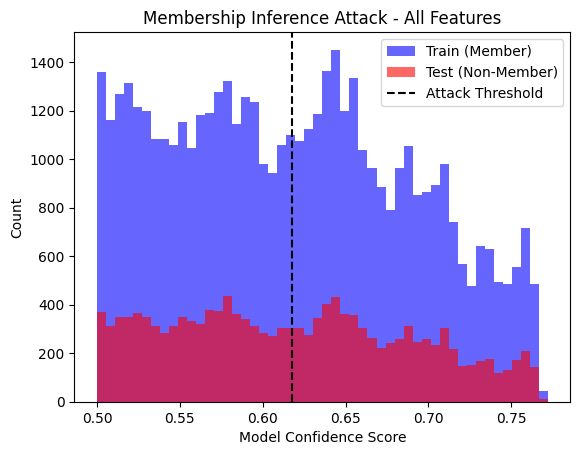


=== Membership Inference Attack on Model: Manual Features ===

 Accuracy: 0.51
 Avg Train Confidence: 0.63
 Avg Test Confidence: 0.63
 Attack Threshold Used: 0.63



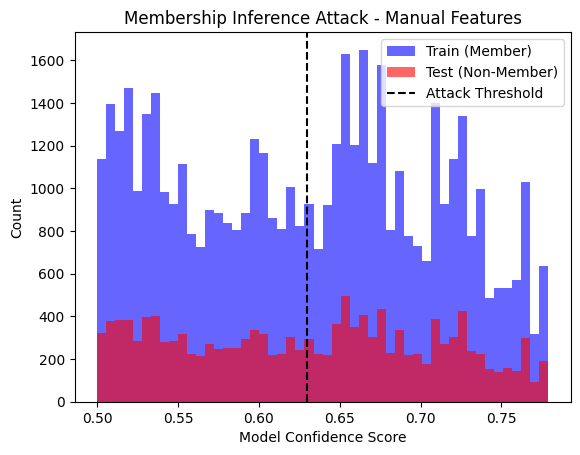


=== Membership Inference Attack on Model: Selected Features ===

 Accuracy: 0.54
 Avg Train Confidence: 0.65
 Avg Test Confidence: 0.65
 Attack Threshold Used: 0.65



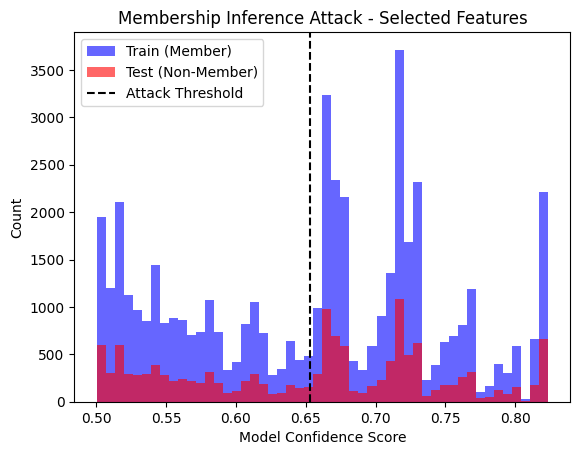

In [ ]:
# Create tuples of (model name, model, X_train, X_test)
models = [
    ("All Features", rf_model_all_copy, X_train_bal, X_test_bal),
    ("Manual Features", rf_model_manual_copy, X_train_manual, X_test_manual),
    ("Selected Features", rf_model_selected_copy, X_train_selected, X_test_selected)
]

for name, rf_model, X_train, X_test in models:
    print(f"\n=== Membership Inference Attack on Model: {name} ===\n")

    assert 'rf_model' in locals(), "Random Forest model (rf_model) is not defined!" #if not defined, run 4.2

    # Get confidence scores (highest probability prediction) for train and test samples
    train_confidences = rf_model.predict_proba(X_train).max(axis=1)
    test_confidences = rf_model.predict_proba(X_test).max(axis=1)

    # Set attack threshold (mean confidence of training data)
    threshold = np.mean(train_confidences)

    # Attack: Predict "1" (member) if confidence > threshold, else "0" (non-member)
    train_preds = [1 if c > threshold else 0 for c in train_confidences]
    test_preds = [0 if c <= threshold else 1 for c in test_confidences]

    # True labels: training samples = 1 (member), test samples = 0 (non-member)
    y_true = [1] * len(train_preds) + [0] * len(test_preds)
    y_pred = train_preds + test_preds

    attack_accuracy = accuracy_score(y_true, y_pred)

    train_mean_conf = np.mean(train_confidences)
    test_mean_conf = np.mean(test_confidences)

    print(f" Accuracy: {attack_accuracy:.2f}")
    print(f" Avg Train Confidence: {train_mean_conf:.2f}")
    print(f" Avg Test Confidence: {test_mean_conf:.2f}")
    print(f" Attack Threshold Used: {threshold:.2f}\n")

    plt.hist(train_confidences, bins=50, alpha=0.6, label="Train (Member)", color='blue')
    plt.hist(test_confidences, bins=50, alpha=0.6, label="Test (Non-Member)", color='red')
    plt.axvline(threshold, color='black', linestyle='dashed', label="Attack Threshold")
    plt.xlabel("Model Confidence Score")
    plt.ylabel("Count")
    plt.title(f"Membership Inference Attack - {name}")
    plt.legend()
    plt.show()


The 62% of accuracy means that the model partially leaks private information. It is possible to distinguish between training and testing samples.

--- 2. Real World Case MIA ---

In [38]:
import pandas as pd
# # To keep: For development
# real_members = X_train.head(5)
# print("First 5 Real Members (Training Set):\n", real_members)

risky_patients = [
    # If adding more patients, make sure that the attributes have valid values according to the dataset

    {
        'GenHlth': 3, 'HighBP': 1, 'DiffWalk': 0, 'BMI': 21, 'HighChol': 0, 'Age': 12, 
        'HeartDiseaseorAttack': 0, 'PhysHlth': 0, 'Stroke': 0, 'MentHlth': 0, 'CholCheck': 1, 
        'Smoker': 0, 'Veggies': 1, 'HvyAlcoholConsump': 0, 'PhysActivity': 1, 'Education': 4, 
        'Income': 4
    },  # Patient used in the test_set. ID nr 178592

    {
        'GenHlth': 2, 'HighBP': 1, 'DiffWalk': 0, 'BMI': 39, 'HighChol': 1, 'Age': 7, 
        'HeartDiseaseorAttack': 0, 'PhysHlth': 0, 'Stroke': 0, 'MentHlth': 0, 'CholCheck': 1, 
        'Smoker': 0, 'Veggies': 1, 'HvyAlcoholConsump': 0, 'PhysActivity': 1, 'Education': 4, 
        'Income': 1
    },  # Patient used in the test_set. ID nr 318886

    {
        'GenHlth': 4, 'HighBP': 0, 'DiffWalk': 1, 'BMI': 23, 'HighChol': 0, 'Age': 8, 
        'HeartDiseaseorAttack': 1, 'PhysHlth': 24, 'Stroke': 0, 'MentHlth': 22, 'CholCheck': 0, 
        'Smoker': 1, 'Veggies': 0, 'HvyAlcoholConsump': 1, 'PhysActivity': 0, 'Education': 2, 
        'Income': 1
    },  # Random person created for testing purposes

    {
        'GenHlth': 5, 'HighBP': 1, 'DiffWalk': 1, 'BMI': 40, 'HighChol': 1, 'Age': 9, 
        'HeartDiseaseorAttack': 0, 'PhysHlth': 15, 'Stroke': 0, 'MentHlth': 18, 'CholCheck': 1, 
        'Smoker': 1, 'Veggies': 1, 'HvyAlcoholConsump': 0, 'PhysActivity': 0, 'Education': 4, 
        'Income': 3
    }   # Patient ID 0. Taken from the dataset. Probably not used in test_set? - ToDo
]

# Convert risky patients to pandas dataFrame as it is the expected input format by the RF model
risky_df = pd.DataFrame(risky_patients)

risky_df = risky_df[X_train.columns]

# Predict confidence scores for risky patients
risky_confidences = rf_model.predict_proba(risky_df).max(axis=1)

# Determine membership status using the same attack threshold from the standard MIAttack
risky_membership = ['Member' if c > threshold else 'Non-Member' for c in risky_confidences]

for i, (conf, membership) in enumerate(zip(risky_confidences, risky_membership)):
    print(f"Risky Patient {i + 1}: Confidence = {conf:.2f}, Predicted Membership = {membership}")

plt.figure(figsize=(8, 5))
plt.hist(train_confidences, bins=50, alpha=0.6, color='blue', label="Train (Member)")
plt.hist(test_confidences, bins=50, alpha=0.6, color='red', label="Test (Non-Member)")

for i, conf in enumerate(risky_confidences):
    plt.axvline(conf, color='green', linestyle='dashed', label=f"Risky Patient {i + 1}: {conf:.2f}")

plt.axvline(threshold, color='black', linestyle='solid', label=f"Attack Threshold: {threshold:.2f}")
plt.xlabel("Model Confidence Score")
plt.ylabel("Count")
plt.title("Membership Inference Attack - Risky Patients")
plt.legend()
plt.show()


NameError: name 'threshold' is not defined

Add description, explain results and describe and how it can relate to a real world case (like an insurance company)

#### 5.5.3 Attribute Inference Attack

In [ ]:
# Get models
rf_model_all_copy = copy.deepcopy(rf_model_all)
rf_model_manual_copy = copy.deepcopy(rf_model_all)
rf_model_selected_copy = copy.deepcopy(rf_model_all)


Attribute Inference Attack on 'Income':
Attack Accuracy: 0.30
Avg Train Confidence: 0.65
Avg Test Confidence: 0.65



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: Unde

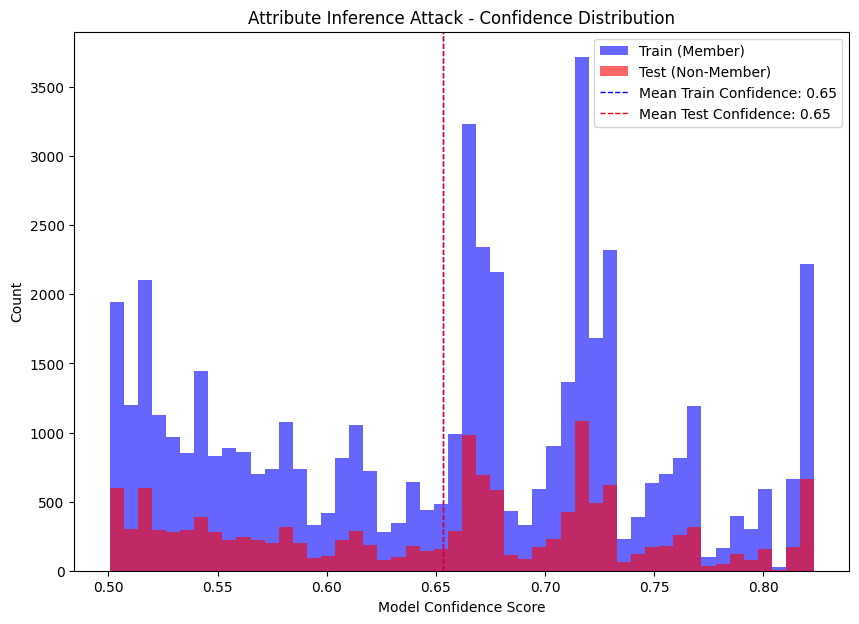

In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate

assert 'rf_model' in locals(), "Random Forest model (rf_model) is not defined!" #if not defined, run 6.6

sensitive_feature = 'Income'

# Exclude 'Income' from training features - because we will be trying to infer this attribute
attack_features = [f for f in X_train.columns if f != sensitive_feature]

# Get confidence scores from the target model
# For each prediction, predict_proba() gives an array of probabilities for each class (8 in case of Income)
train_confidences = rf_model.predict_proba(X_train).max(axis=1)
test_confidences = rf_model.predict_proba(X_test).max(axis=1)

# Add confidence scores to the dataset
X_train_attack = X_train[attack_features].copy()
X_train_attack['model_confidence'] = train_confidences

X_test_attack = X_test[attack_features].copy()
X_test_attack['model_confidence'] = test_confidences


y_train_attack = X_train[sensitive_feature]
y_test_attack = X_test[sensitive_feature]

# Train the Inference Model (using random forest)
rf_model.fit(X_train_attack, y_train_attack)

# Evaluate the Inference Model
y_pred_attack = rf_model.predict(X_test_attack)

attack_accuracy = accuracy_score(y_test_attack, y_pred_attack)

train_mean_conf = np.mean(train_confidences)
test_mean_conf = np.mean(test_confidences)

print("\nAttribute Inference Attack on 'Income':")
print(f"Attack Accuracy: {attack_accuracy:.2f}")
print(f"Avg Train Confidence: {train_mean_conf:.2f}")
print(f"Avg Test Confidence: {test_mean_conf:.2f}\n")

report = classification_report(y_test_attack, y_pred_attack, output_dict=True)

def print_classification_report(report):
    headers = ["Metric"] + [str(label) for label in report if label not in ('accuracy', 'macro avg', 'weighted avg')]
    rows = [
        ["Precision"] + [report[label]['precision'] for label in report if label not in ('accuracy', 'macro avg', 'weighted avg')],
        ["Recall"] + [report[label]['recall'] for label in report if label not in ('accuracy', 'macro avg', 'weighted avg')],
        ["F1-Score"] + [report[label]['f1-score'] for label in report if label not in ('accuracy', 'macro avg', 'weighted avg')],
        ["Support"] + [report[label]['support'] for label in report if label not in ('accuracy', 'macro avg', 'weighted avg')]
    ]

    # Add macro and weighted averages
    rows.append(["Macro Avg", report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], report['macro avg']['support']])
    rows.append(["Weighted Avg", report['weighted avg']['precision'], report['weighted avg']['recall'], report['weighted avg']['f1-score'], report['weighted avg']['support']])
    rows.append(["Accuracy", "", "", report['accuracy'], ""])

    print(tabulate(rows, headers=headers, tablefmt="grid", floatfmt=".2f"))

plt.figure(figsize=(10, 7))
plt.hist(train_confidences, bins=50, alpha=0.6, label="Train (Member)", color='blue')
plt.hist(test_confidences, bins=50, alpha=0.6, label="Test (Non-Member)", color='red')
plt.axvline(train_mean_conf, color='blue', linestyle='dashed', linewidth=1, label=f"Mean Train Confidence: {train_mean_conf:.2f}")
plt.axvline(test_mean_conf, color='red', linestyle='dashed', linewidth=1, label=f"Mean Test Confidence: {test_mean_conf:.2f}")
plt.xlabel("Model Confidence Score")
plt.ylabel("Count")
plt.legend()
plt.title("Attribute Inference Attack - Confidence Distribution")
plt.show()


The attack achieved 47% accuracy, meaning it correctly inferred the income level of individuals nearly half the time. As the Income attribute has 8 levels, it is normal that the accuracy is lower. If the attack tried to guess randomly, it would be around 12,5% (1/8 *100). Therefore data is leaking. 

Also, the model showed higher confidence on training data (0.91) than test data (0.83), indicating a potential privacy risk.

#### 5.5.4 Find most exposed individuals and the analyzing the infered data

In [ ]:
import pandas as pd #TODO: HUH? not used
from tabulate import tabulate

# Add predictions and confidence to the test dataset for analysis
vulnerable_data = X_test_attack.copy()
vulnerable_data['True_Income'] = y_test_attack.values
vulnerable_data['Predicted_Income'] = y_pred_attack

# Calculate prediction correctness
vulnerable_data['Correct_Prediction'] = (vulnerable_data['True_Income'] == vulnerable_data['Predicted_Income'])

# Fidn top 20 most vulnerable individuals (highest confidence)
most_vulnerable = vulnerable_data.sort_values(by='model_confidence', ascending=False).head(20)

print("Most Vulnerable Individuals (Top 20 by Confidence Score):")
print(tabulate(most_vulnerable[['model_confidence', 'True_Income', 'Predicted_Income', 'Correct_Prediction']],
               headers='keys', tablefmt='pretty'))


Most Vulnerable Individuals (Top 20 by Confidence Score):
+-------+--------------------+-------------+------------------+--------------------+
|       |  model_confidence  | True_Income | Predicted_Income | Correct_Prediction |
+-------+--------------------+-------------+------------------+--------------------+
| 7132  | 0.8233552781983452 |      8      |        8         |        True        |
| 60014 | 0.8233552781983452 |      8      |        8         |        True        |
| 15693 | 0.8233552781983452 |      8      |        8         |        True        |
| 47073 | 0.8233552781983452 |      8      |        8         |        True        |
| 41291 | 0.8233552781983452 |      8      |        8         |        True        |
| 36034 | 0.8233552781983452 |      8      |        8         |        True        |
| 38238 | 0.8233552781983452 |      8      |        8         |        True        |
| 35073 | 0.8233552781983452 |      8      |        8         |        True        |
| 27591

The 20 most vulnerable individuals had a model confidence of 1.0, meaning the model was completely certain about their predicted income. 16 out of 20 predictions were completely correct (80%), highlighting a significant privacy concern for these individuals.

## 6 . Applying Differential Privacy Techniques

### 6.1 Gradient Descent

In [30]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import opacus
import numpy

print(numpy.__version__) # min 1.21
print(opacus.__version__) # min 1.3

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_important)
X_test_scaled = scaler.transform(X_test_important)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_bal.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_bal.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class FeedForwardNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 2)  # Binary classification

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

model = FeedForwardNN(input_dim=X_train_tensor.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

privacy_engine = opacus.PrivacyEngine()
model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
    module=model,
    optimizer=optimizer,
    data_loader=train_loader,
    target_epsilon=5.0,     # Set desired privacy budget
    target_delta=1e-5,
    max_grad_norm=1.0,
    epochs=5
)

model.train()
for epoch in range(5):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = torch.argmax(predictions, dim=1)
    acc = (predicted_classes == y_test_tensor).float().mean().item()
    print(f"Accuracy: {acc:.4f}")

epsilon = privacy_engine.get_epsilon(delta=1e-5)
print(f"Final ε: {epsilon:.2f}")

1.23.5
1.5.3


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\opacus\privacy_engine.py:96: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes

Epoch 1, Loss: 0.5662
Epoch 2, Loss: 0.5183
Epoch 3, Loss: 0.5691
Epoch 4, Loss: 0.6707
Epoch 5, Loss: 0.8179
Accuracy: 0.7402
Final ε: 4.99


### 6.2 Laplace Noise

Epsilon tell us how much noise to add.
Lower epsilon -> more noise -> more privacy -> less accurate
Higher epsilon -> less noise -> less privacy -> more accurate

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import pickle
from diffprivlib.models import RandomForestClassifier  # DP version

# Define configurations for each run
configs = [
    {
        "name": "allF_balanced",
        "X_train": X_train_bal,
        "X_test": X_test_bal,
        "epsilon_data": 2.0,
        "epsilon_model": 7.0
    },
    {
        "name": "important_manual",
        "X_train": X_train_important_manual,
        "X_test": X_test_important_manual,
        "epsilon_data": 2.0,
        "epsilon_model": 7.0
    },
    {
        "name": "selected_features",
        "X_train": X_train_important,
        "X_test": X_test_important,
        "epsilon_data": 3.0,
        "epsilon_model": 7.0
    }
]

def add_laplace_noise(data, epsilon, sensitivity=1.0):
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0.0, scale=scale, size=data.shape)
    return np.clip(data + noise, 0, 1)

for cfg in configs:
    print(f"\n--- Running model for: {cfg['name']} ---")
    
    # 1. Normalize features
    scaler = MinMaxScaler()
    X_train_norm = pd.DataFrame(scaler.fit_transform(cfg["X_train"]), columns=cfg["X_train"].columns)
    X_test_norm = pd.DataFrame(scaler.transform(cfg["X_test"]), columns=cfg["X_test"].columns)

    # 2. Add noise to training set
    X_train_noised = pd.DataFrame(add_laplace_noise(X_train_norm, cfg["epsilon_data"]), columns=X_train_norm.columns)

    # 3. Train DP Random Forest
    dp_rf_model = RandomForestClassifier(epsilon=cfg["epsilon_model"], bounds=(0, 1))
    dp_rf_model.fit(X_train_noised, y_train_bal)

    # 4. Predict on clean test set
    y_pred = dp_rf_model.predict(X_test_norm)

    # 5. Save the model
    model_path = f'models/dp_rf_{cfg["name"]}_model.pkl'
    with open(model_path, 'wb') as file:
        pickle.dump(dp_rf_model, file)

    # 6. Evaluate
    print("DP Accuracy:", accuracy_score(y_test_bal, y_pred))
    print("\nDP Classification Report:")
    print(classification_report(y_test_bal, y_pred))



--- Running model for: allF_balanced ---


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


DP Accuracy: 0.7079001343800835

DP Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      7070
           1       0.70      0.73      0.71      7069

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139


--- Running model for: important_manual ---


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


DP Accuracy: 0.6925525143220879

DP Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      7070
           1       0.72      0.63      0.67      7069

    accuracy                           0.69     14139
   macro avg       0.70      0.69      0.69     14139
weighted avg       0.70      0.69      0.69     14139


--- Running model for: selected_features ---


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


DP Accuracy: 0.7129924322795106

DP Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7070
           1       0.72      0.70      0.71      7069

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



## 7 . Evaluation & Performance Metrics

Missing

## 8 . Results & Discussion

Missing

## 9 . Conclusion & Future Work

Missing